# Bandit Problem

In [50]:
# imports
from bandits import Bandit
import random
import numpy as np
import matplotlib.pyplot as plt
import math
# Include your imports here, if any are used. 

A bandit is one option (or “arm”) you can choose, where the reward you get is uncertain and must be learned by trying it out.
In multi-armed bandits, you repeatedly pick among several such uncertain options to find which one pays best.

A list of ten bandit objects initialized in the list...

In [4]:
bandits = [Bandit(random.random()*4-2) for _ in range(10)]

To generate reward from that bandit, use the pullLever() command

In [5]:
bandits[0].pullLever()

2.099019140810987

## Greedy algorithm Implementation

In [6]:
def run_greedy():
    avg_till_now=[0.0 for _ in range(10)]
    reward_list=[]
    times_chosen = [0]*10
    for iterations in range(1,1001):
        reward=0
        maximum=max(avg_till_now)
        max_avg=[]
        for j in range(10):
            if avg_till_now[j]==maximum:
                max_avg.append(j)
        if len(max_avg)==1:
            reward = bandits[max_avg[0]].pullLever()
            times_chosen[max_avg[0]]+=1
            reward_list.append(reward)
            avg_till_now[max_avg[0]]+=(reward-avg_till_now[max_avg[0]])/times_chosen[max_avg[0]]
        
        if len(max_avg)!=1:
            selected=random.choice(max_avg)
            reward = bandits[selected].pullLever()
            times_chosen[selected]+=1
            reward_list.append(reward)
            avg_till_now[selected]+=(reward-avg_till_now[selected])/times_chosen[selected]
    return reward_list

Plot the cumulative average of rewards as the number of iterations increases. and display that image below.

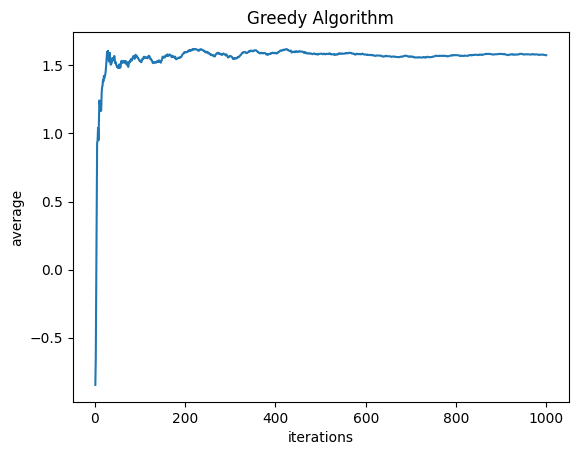

In [37]:
reward=run_greedy()
x=np.arange(1,1001)
y=[sum(reward[:i])/i for i in np.arange(1,1001)]
plt.plot(x,y)
plt.xlabel("iterations")
plt.ylabel("average")
plt.title("Greedy Algorithm")
plt.show()

## $\epsilon$-greedy Algorithm

In [8]:
def run_epsilon_greedy(epsilon):
    reward_list = []
    reward=0
    avg=[0]*10
    is_epsilion = [True, False]
    probablities = [epsilon, 1-epsilon]
    times_chosen=[0]*10
    for i in range(1,1001):
        if(np.random.choice(is_epsilion, p=probablities)):
            e_pull = random.randint(0,9)
            reward = bandits[e_pull].pullLever()
            times_chosen[e_pull]+=1
            reward_list.append(reward)
            avg[e_pull]+=1/times_chosen[e_pull] * (reward-avg[e_pull])
        else:
            greedy=max(avg)
            greedy_list=[]
            for j in range(10):
                if avg[j]==greedy:
                    greedy_list.append(j)
            if len(greedy_list)==1:
                reward=bandits[greedy_list[0]].pullLever()
                reward_list.append(reward)
                times_chosen[greedy_list[0]]+=1
                avg[greedy_list[0]]+=1/times_chosen[greedy_list[0]] * (reward-avg[greedy_list[0]])
            else:
                select=random.choice(greedy_list)
                reward=bandits[select].pullLever()
                
                times_chosen[select]+=1
                avg[select]+=1/times_chosen[select] * (reward-avg[select])
    return reward_list

Plot the cumulative average of rewards as the number of iterations increases but for various values of $\epsilon$.

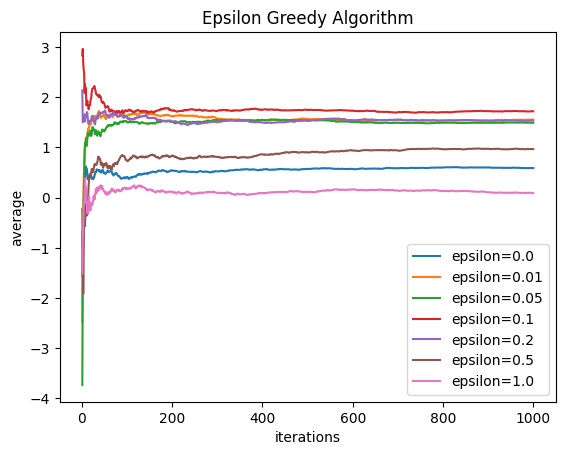

In [41]:
x=np.arange(1,1001)
epsilons=[0.0,0.01,0.05,0.1,0.2,0.5,1.0]
for epsilon in epsilons:
    reward = run_epsilon_greedy(epsilon)
    y=[sum(reward[:i])/i for i in np.arange(1,1001)]
    plt.plot(x, y, label =f"epsilon={epsilon}")
plt.xlabel("iterations")
plt.ylabel("average")
plt.title("Epsilon Greedy Algorithm")
plt.legend()
plt.show()

## Finding the optimal $\epsilon$

Run the $\epsilon$-greedy algorithm for 1000 iterations and find the optimal $\epsilon$ value by plotting the cumulative average of rewards for various values of $\epsilon$

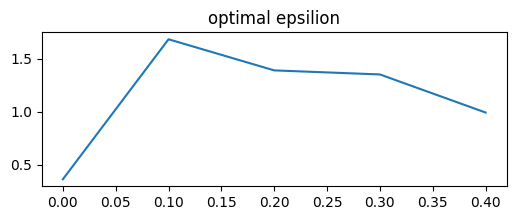

In [43]:
x=np.arange(0.0, 0.5, 0.1)
y=[sum(run_epsilon_greedy(e))/1000 for e in np.arange(0.0, 0.5, 0.1)] 
fig, ax = plt.subplots(figsize=(6, 2))
ax.plot(x, y)
ax.set_title('optimal epsilion')
plt.show()

## Optimistic Initial Values

In [45]:
def run_optimistic_greedy():
    avg_till_now=[10 for _ in range(10)]
    reward_list=[]
    times_chosen = [0]*10
    for iterations in range(1,1001):
        reward=0
        maximum=max(avg_till_now)
        max_avg=[]
        for j in range(10):
            if avg_till_now[j]==maximum:
                max_avg.append(j)
        if len(max_avg)==1:
            reward = bandits[max_avg[0]].pullLever()
            times_chosen[max_avg[0]]+=1
            reward_list.append(reward)
            avg_till_now[max_avg[0]]+=(1/times_chosen[max_avg[0]]) * (reward-avg_till_now[max_avg[0]])
        
        if len(max_avg)!=1:
            selected=random.choice(max_avg)
            reward = bandits[selected].pullLever()
            times_chosen[selected]+=1
            reward_list.append(reward)
            avg_till_now[selected]+=(1/times_chosen[selected]) * (reward-avg_till_now[selected])
    return reward_list

Plot the cumulative average of rewards as the number of iterations increases for an optimistic greedy of $Q_1 = 10$ and a non-optimistic $\epsilon = 0.1$ and try to compare which is better.

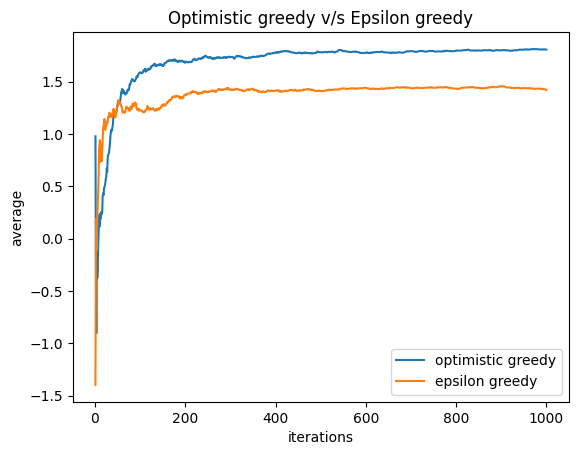

In [49]:
x=np.arange(1,1001)
reward_optimistic=run_optimistic_greedy()
y_optimistic=[sum(reward_optimistic[:i])/i for i in np.arange(1,1001)]
reward_epsilion=run_epsilon_greedy(0.1)
y_epsilion=[sum(reward_epsilion[:i])/i for i in np.arange(1,1001)]
plt.plot(x,y_optimistic,label="optimistic greedy")
plt.plot(x,y_epsilion,label="epsilon greedy")
plt.xlabel("iterations")
plt.ylabel("average")
plt.title("Optimistic greedy v/s Epsilon greedy")
plt.legend()
plt.show()

## Upper Confidence Bound (UCB)

In [ ]:
def run_ucb(c):
    avg=[0 for _ in range(10)]
    reward_list=[]
    times_chosen = [0]*10
    for iterations in range(1,1001):
        UCB=[]
        for _ in range(10):
            if times_chosen[_]!=0:
                UCB.append(avg[_] + c*math.sqrt(math.log(iterations)/times_chosen[_]))
            else:
                UCB.append(10000000000) #a very big number for infinity
        reward=0
        maximum=max(UCB)
        max_UCB=[]
        for j in range(10):
            if UCB[j]==maximum:
                max_UCB.append(j)
        if len(max_UCB)==1:
            reward = bandits[max_UCB[0]].pullLever()
            times_chosen[max_UCB[0]]+=1
            reward_list.append(reward)
            avg[max_UCB[0]]+=(1/times_chosen[max_UCB[0]]) * (reward-avg[max_UCB[0]])
        
        if len(max_UCB)!=1:
            selected=random.choice(max_UCB)
            reward = bandits[selected].pullLever()
            times_chosen[selected]+=1
            reward_list.append(reward)
            avg[selected]+=(1/times_chosen[selected]) * (reward-avg[selected])
    return reward_list

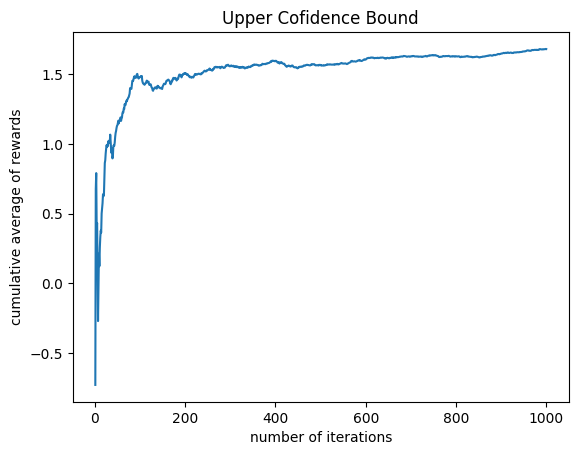

In [ ]:
reward=run_ucb(2)
x=np.arange(1,1001)
y=[sum(reward[:i])/i for i in np.arange(1,1001)]
plt.plot(x,y)
plt.xlabel("number of iterations")
plt.ylabel("cumulative average of rewards")
plt.title("Upper Cofidence Bound")
plt.show()